In [669]:
from src import Prep
from src.Time_Series_Helper_Funcs import *
from src.Regression_Helper_Funcs import * 
import warnings
warnings.filterwarnings('ignore')

In [471]:
%load_ext autoreload
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [676]:
%autoreload

# DATA

## Load in, clean, sort, and filter data

In [520]:
df = Prep.prep()

1 of 11 |    Reading in first dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 35.671024 seconds.
2 of 11 |    Reading in second dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 2.847851 seconds.
3 of 11 |    Concatenating datasets together
4 of 11 |    Refining to only RES Customer Segment
5 of 11 |    Cleaning up column names
6 of 11 |    Sorting values by installation_date
7 of 11 |    Assigning installation_date as index
8 of 11 |    Replacing all null values with median values from same year
9 of 11 |    Adusting prices for inflation
Elapsed time is 52.867329 seconds.
10 of 11|    Creating target variable: cost_per_watt
11 of 11|    Removing > 1600 outliers above $25 per watt
Prep complete 
 ------

In [5]:
y = time_frame(df)

# REGRESSION

## Run through basic regression models: OLS, Linear OLS, and Random Forest Regressor 

In [289]:
%autoreload

In [439]:
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
score_table(y, ols_model, linear_model, rf_model)

,MAE,MSE,RMSE,P_VALUE
Models,,,,
OLS,0.189762,0.120843,0.347625,0.688719
LINEAR,0.555970,0.555970,0.745634,0.953549
RF,0.073019,0.020496,0.143165,0.713491


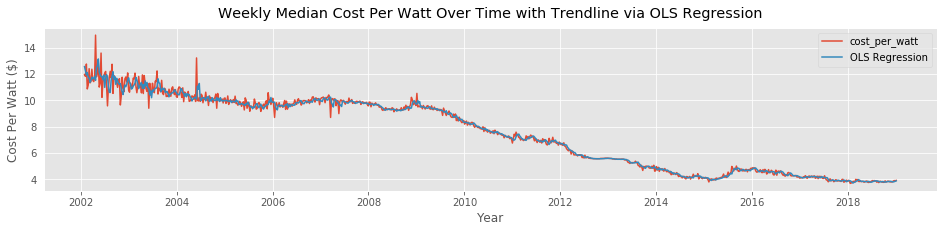

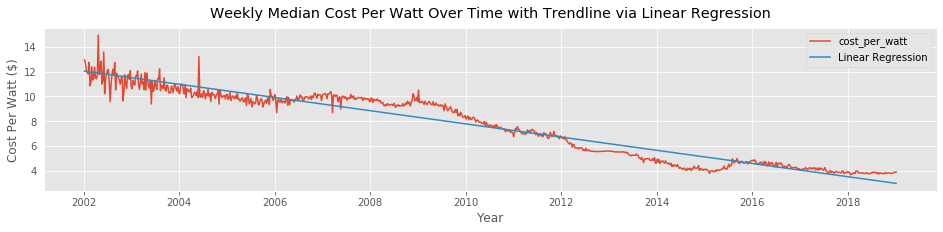

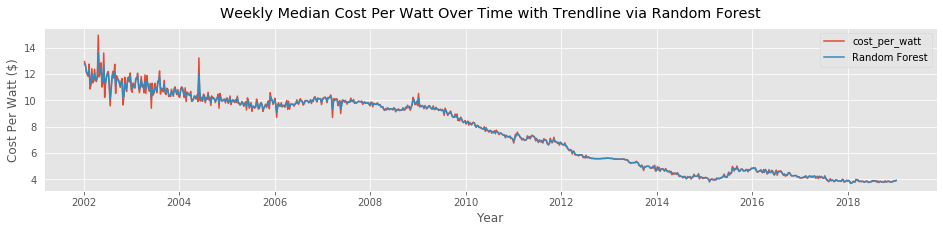

In [294]:
plot_regres_model(y[3:], ols_trend, 'OLS Regression')
plot_regres_model(y, linear_trend, 'Linear Regression')
plot_regres_model(y, rf_trend, 'Random Forest')

# Run through basic average model

In [91]:
simple_move(y)

cost_1weekago [
 MAE: 0.05 
 MSE: 0.0 
 RMSE: 0.07 ]
cost_3weeksago [
 MAE: 0.07 
 MSE: 0.01 
 RMSE: 0.09 ]
None None


# TIME SERIES

## Check for Stationarity

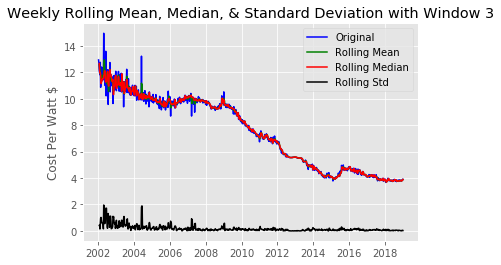

Results of Dickey-Fuller Test:
Test Statistic                  -1.323589
p-value                          0.618312
#Lags Used                      21.000000
Number of Observations Used    866.000000
Critical Value (1%)             -3.437924
Critical Value (5%)             -2.864883
Critical Value (10%)            -2.568550
dtype: float64


In [9]:
rolling_plot(y)
dfuller_test(y)

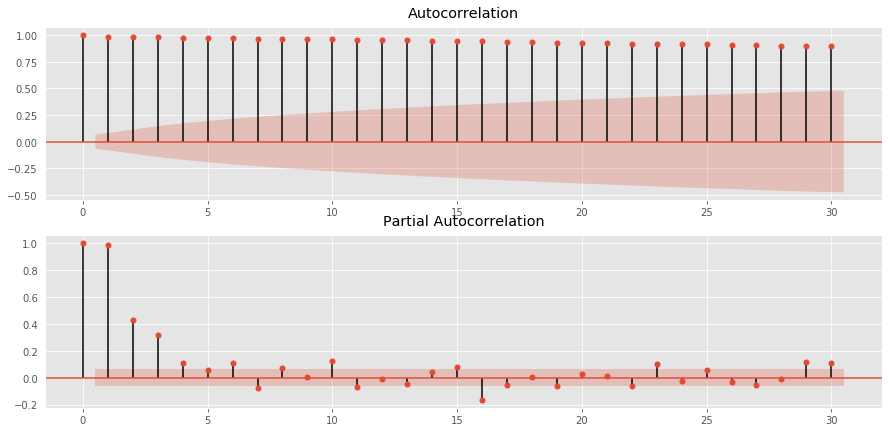

In [47]:
autocor_plots(y)

## Create differenced data

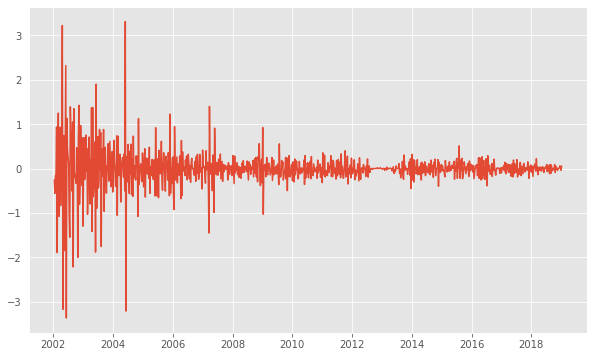

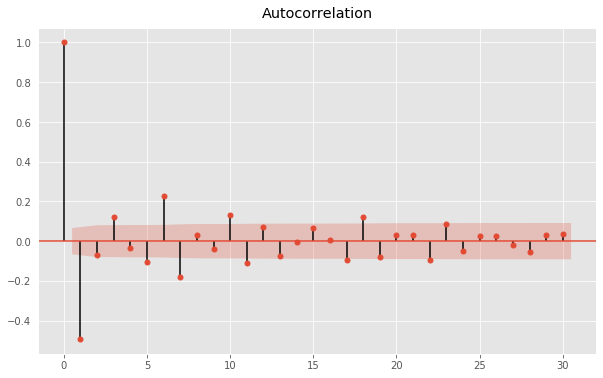

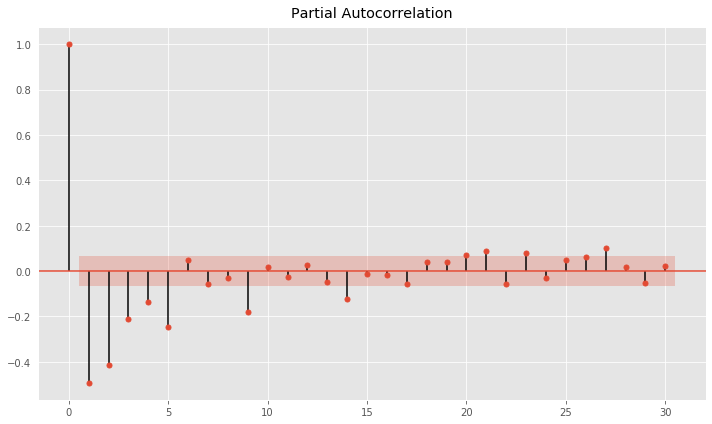

In [473]:
diff = get_differences(y)

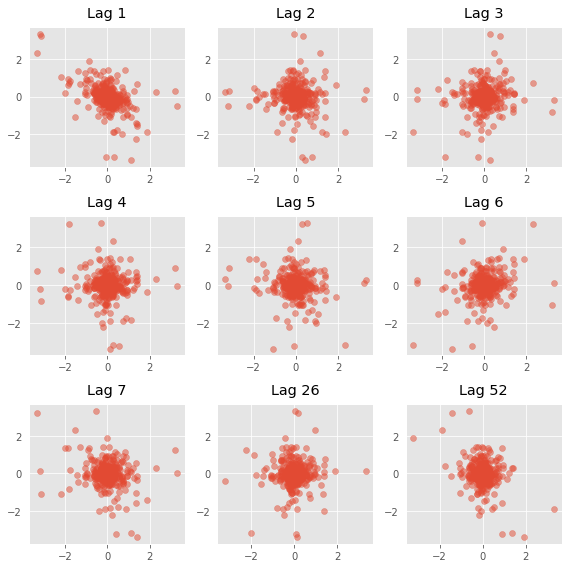

In [672]:
plot_ac_scat(diff)

In [40]:
test_for_stationarity(diff)

ADF p-value: 0.00
Achieved stationarity! Reject ADF H0.


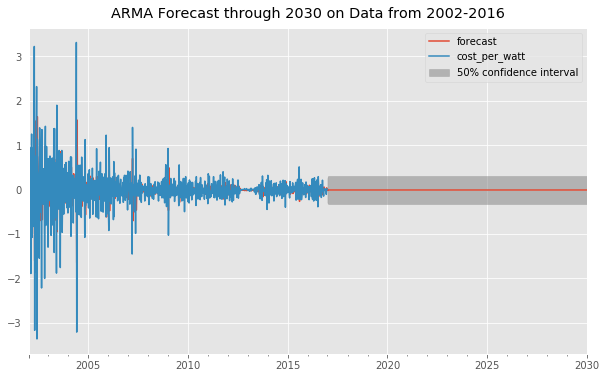

Confidence Intervals for ARMA Forecast through 2030 on Data from 2002-2016                             0         1
const               -0.030252  0.008003
ar.L1.cost_per_watt -0.553421 -0.431490
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood                -406.005
Method:                       css-mle   S.D. of innovations              0.407
Date:                Thu, 19 Mar 2020   AIC                            818.011
Time:                        16:52:21   BIC                            831.993
Sample:                    01-13-2002   HQIC                           823.388
                         - 12-25-2016                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

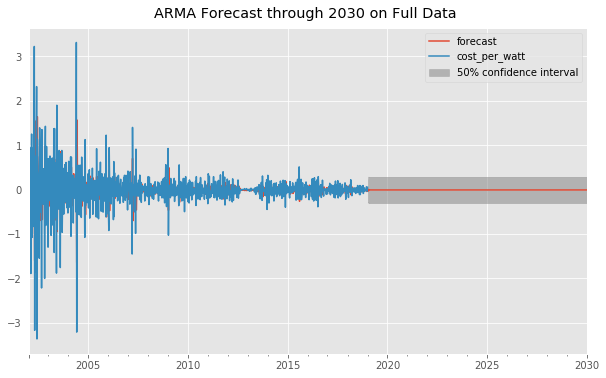

Confidence Intervals for ARMA Forecast through 2030 on Full Data                             0         1
const               -0.027008  0.006780
ar.L1.cost_per_watt -0.549122 -0.434644
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  887
Model:                     ARMA(1, 0)   Log Likelihood                -407.101
Method:                       css-mle   S.D. of innovations              0.383
Date:                Thu, 19 Mar 2020   AIC                            820.201
Time:                        16:52:21   BIC                            834.565
Sample:                    01-13-2002   HQIC                           825.692
                         - 01-06-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const  

In [677]:
ARMA_plots(diff)

## Run regression on differenced data

In [441]:
#ORIGINAL REGRESSION
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
print('Regression Models on original data')
score_table(y, ols_model, linear_model, rf_model)


Regression Models on original data


,MAE,MSE,RMSE,P_VALUE
Models,,,,
OLS,0.189762,0.120843,0.347625,0.688719
LINEAR,0.555970,0.555970,0.745634,0.953549
RF,0.071960,0.019184,0.138508,0.737482


In [450]:
# RUN STATIONARY DATA THROUGH ORIGINAL REGRESSION
tsols_model, tsols_trend = stat_lag_ols_model(diff)[0], stat_lag_ols_model(diff)[1]
tslinear_model, tslinear_trend = stat_linear_ols_model(diff)[0], stat_linear_ols_model(diff)[1]
tsrf_model, tsrf_trend = stat_randomforest_model(diff)[0], stat_randomforest_model(diff)[1]
print('Regression Models on differenced stationary data')
stat_score_table(diff, tsols_model, tslinear_model, tsrf_model)

Regression Models on differenced stationary data


,MAE,MSE,RMSE,P_VALUE
Models,,,,
OLS,0.184800,0.115255,0.339493,5.272663e-09
LINEAR,0.227956,0.227956,0.477447,9.672850e-01
RF,0.125922,0.063275,0.251544,1.463611e-13


#### REFLECTION
OLS did slightly better<br>
LINEAR did much better<br>
RF did much worse<br>

## Visualize Differenced Data 

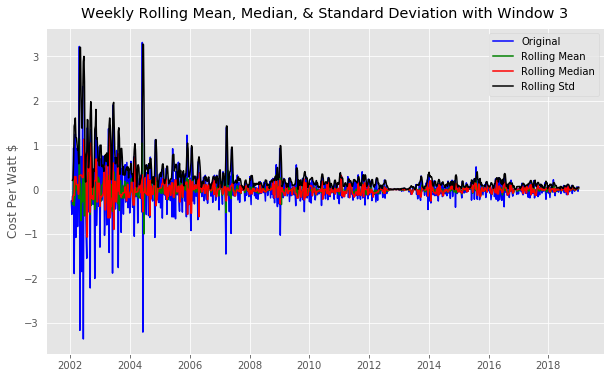

Results of Dickey-Fuller Test:
Test Statistic                -6.775243e+00
p-value                        2.580703e-09
#Lags Used                     2.100000e+01
Number of Observations Used    8.650000e+02
Critical Value (1%)           -3.437932e+00
Critical Value (5%)           -2.864887e+00
Critical Value (10%)          -2.568552e+00
dtype: float64


In [475]:
rolling_plot(diff[1:])
dfuller_test(diff[1:])

In [ ]:
evaluate_models(df.values.dropna(), p_values, d_values, q_values)

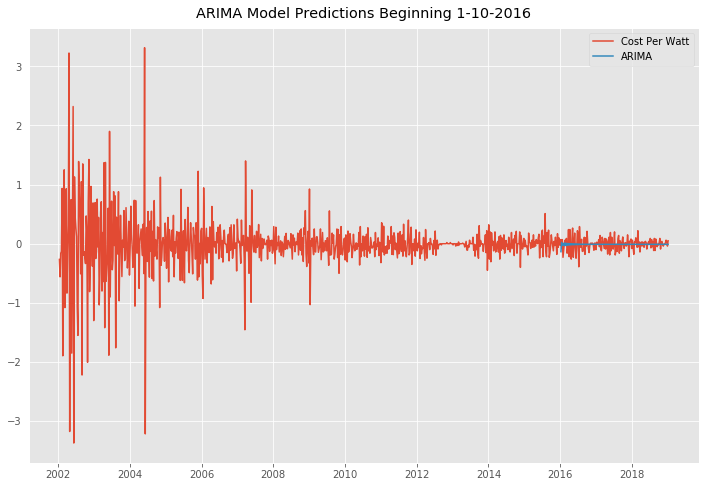

 Mean Absolute Error =       0.084339
 Mean Squared Error =        0.012261
 Root Mean Squared Error =   0.0


In [660]:
arima_model_fit = arima_model_forecast(diff)